## 1. Data Loading

In this section, we load the COVID-19 dataset from "Our World in Data" and preview the first few rows. We check for column names and ensure that the dataset is loaded correctly.

We will also check for any missing values in the dataset to understand its structure before cleaning the data.

Let’s load the data and preview it:


In [12]:
import pandas as pd

# Load the datasetC:/Users/ADMIN/Downloads/owid-covid-data.csv
df = pd.read_csv('C:/Users/ADMIN/Downloads/owid-covid-data.csv')

# Display first few rows to inspect
print(df.head())

# Display columns to understand data structure
print(df.columns)

# Check for missing values
print(df.isnull().sum())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

## 2. Data Cleaning

In this section, we prepare the data for analysis. This involves:
- Filtering the dataset to focus on specific countries (India, USA, Kenya).
- Dropping rows with missing or irrelevant data.
- Converting the 'date' column to a datetime format for proper time-series analysis.
- Handling missing numeric values using interpolation.

After cleaning, we will have a dataset ready for exploratory analysis.

Let’s clean the data now:


In [13]:


# Checking for missing values in the dataset
df.isnull().sum()

# Filter countries of interest (e.g., Kenya, USA, India)
countries_of_interest = ['Kenya', 'USA', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing dates/critical values
df_cleaned = df_filtered.dropna(subset=['date', 'total_cases', 'total_deaths'])

# Convert the `date` column to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Handle missing numeric values by filling them with 0 or interpolate if necessary
df_cleaned.fillna(0, inplace=True)

# Verify cleaned data
df_cleaned.head()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\3754022257.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\3754022257.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


## 3. Exploratory Data Analysis (EDA)

In this section, we perform exploratory analysis to uncover trends in the data. We will:
- Analyze the total number of cases and deaths over time for the selected countries.
- Compare the daily new cases between countries.
- Calculate the death rate for each country as a ratio of total deaths to total cases.

These steps will help us understand the COVID-19 impact across different countries and identify any interesting trends.

Let's begin the analysis:


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

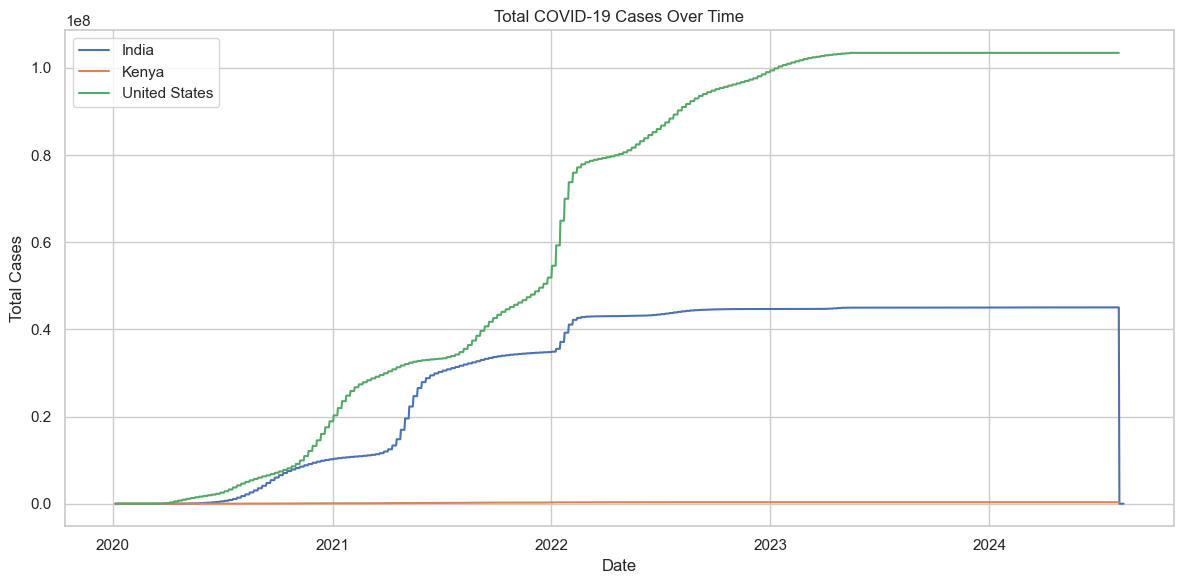

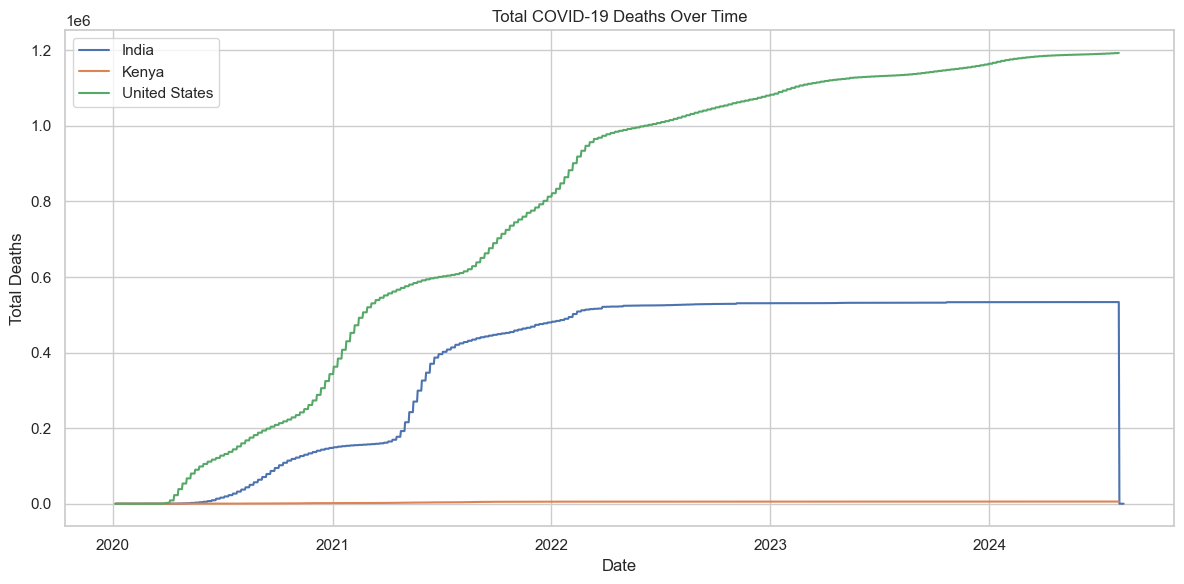

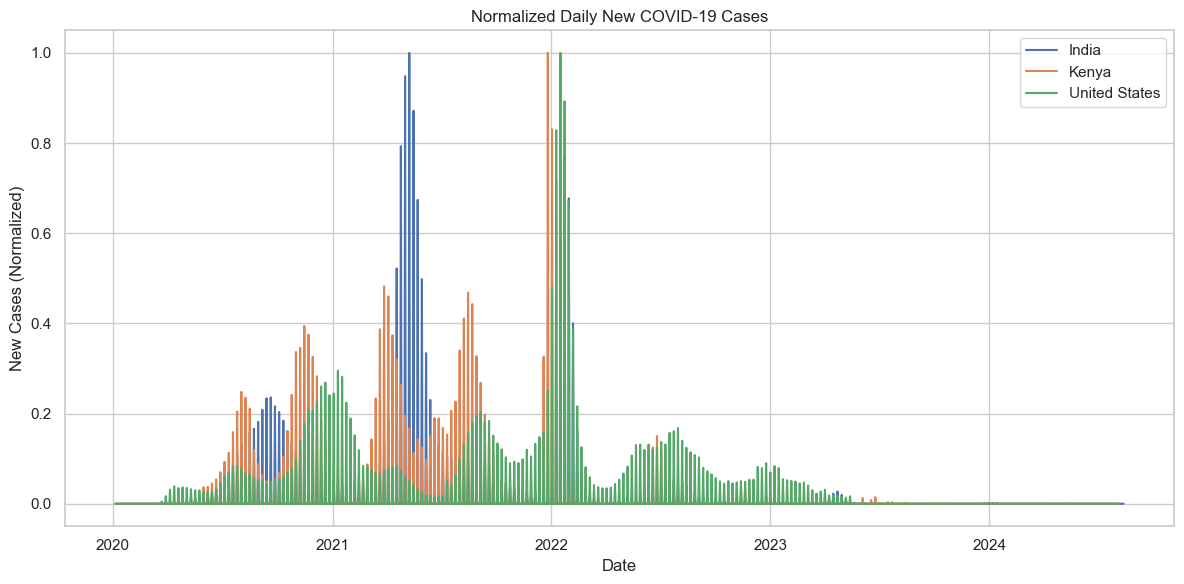

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927.py:70: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927.py:71: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927

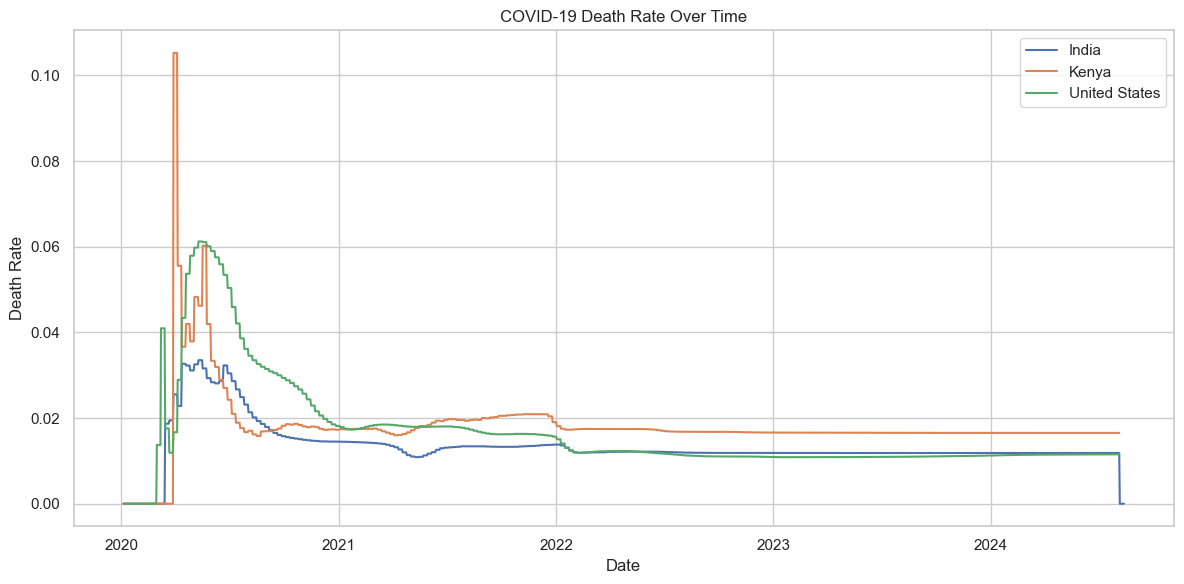

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12112\1895329927.py:90: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




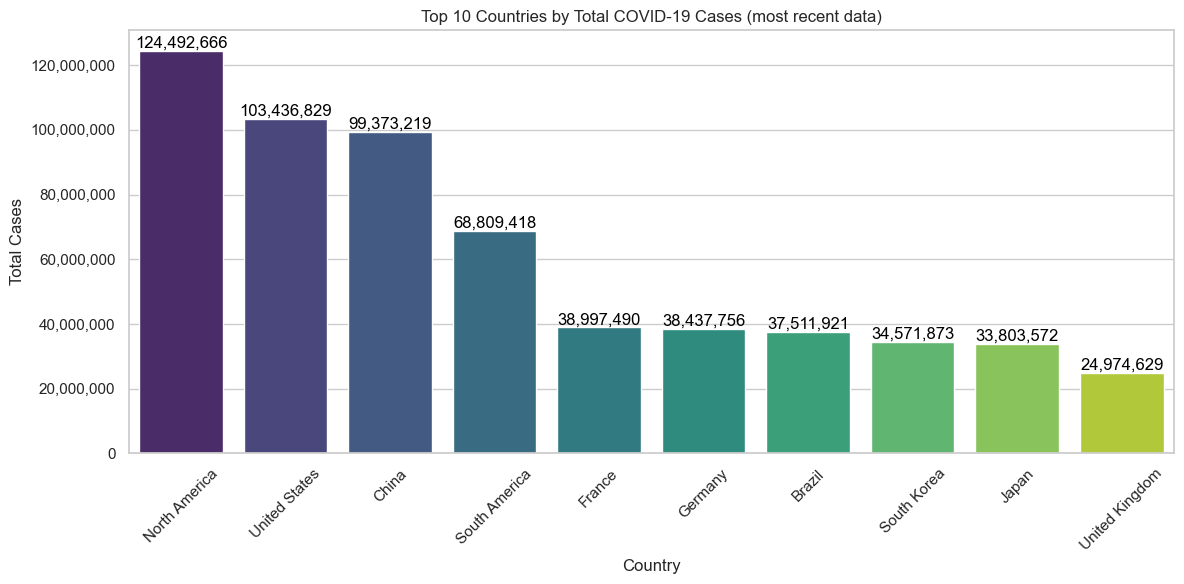

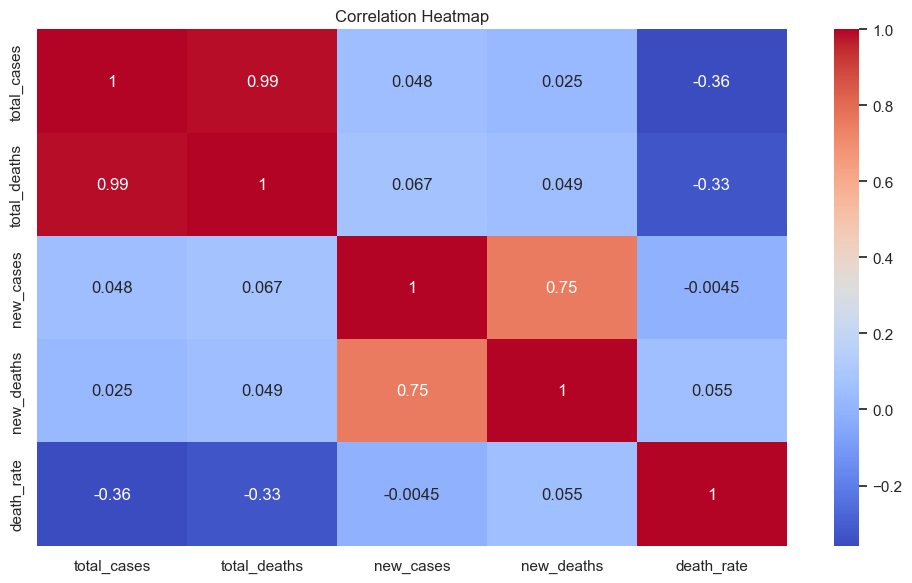

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load full dataset
full_df = pd.read_csv('C:/Users/ADMIN/Downloads/owid-covid-data.csv')
full_df['date'] = pd.to_datetime(full_df['date'], errors='coerce')

# Fill missing values
for df_temp in [full_df]:
    df_temp['total_cases'].fillna(0, inplace=True)
    df_temp['total_deaths'].fillna(0, inplace=True)
    df_temp['new_cases'].fillna(0, inplace=True)
    df_temp['new_deaths'].fillna(0, inplace=True)

# Filter for selected countries
df = full_df[full_df['location'].isin(['Kenya', 'India', 'United States'])]

# Set seaborn style
sns.set(style="whitegrid")

# 1️⃣ Line Chart: Total COVID-19 Cases Over Time
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

# 2️⃣ Line Chart: Total COVID-19 Deaths Over Time
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# 3️⃣ Line Chart: Daily New COVID-19 Cases
plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country].copy()
    # Normalize new cases (0 to 1 scale)
    max_cases = country_data['new_cases'].max()
    if max_cases > 0:
        country_data['new_cases_normalized'] = country_data['new_cases'] / max_cases
    else:
        country_data['new_cases_normalized'] = 0
    plt.plot(country_data['date'], country_data['new_cases_normalized'], label=country)

plt.title("Normalized Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases (Normalized)")
plt.legend()
plt.tight_layout()
plt.show()



# 4️⃣ Line Chart: Death Rate Over Time

df['death_rate'] = df['total_deaths'] / df['total_cases']
df['death_rate'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['death_rate'].fillna(0, inplace=True)

plt.figure(figsize=(12, 6))
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
plt.show()

# 5️⃣ Bar Chart: Top 10 Countries by Total Cases (using most recent data available per country)
latest_cases_by_country = full_df.sort_values('date').dropna(subset=['total_cases']).groupby('location').tail(1)
top_countries = latest_cases_by_country.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=top_countries, x='location', y='total_cases', palette='viridis')
plt.title("Top 10 Countries by Total COVID-19 Cases (most recent data)")
plt.xlabel("Country")
plt.ylabel("Total Cases")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add value labels
for index, value in enumerate(top_countries['total_cases']):
    barplot.text(index, value, format(int(value), ','), color='black', ha="center", va="bottom")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6️⃣ (Optional) Heatmap: Correlation Analysis
plt.figure(figsize=(10, 6))
corr = df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'death_rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 4. Visualizations

In this section, we generate visualizations to better understand the COVID-19 trends globally. We’ll visualize:
- Cumulative vaccinations over time.
- Comparisons of the vaccination progress across countries.

Let’s visualize the vaccination progress and compare countries:


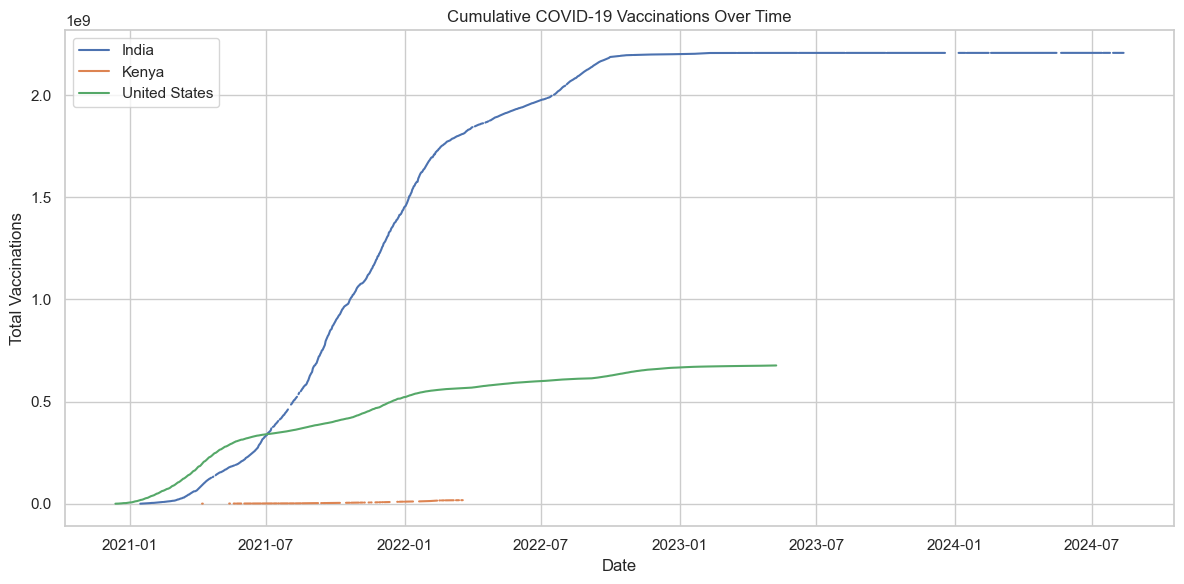

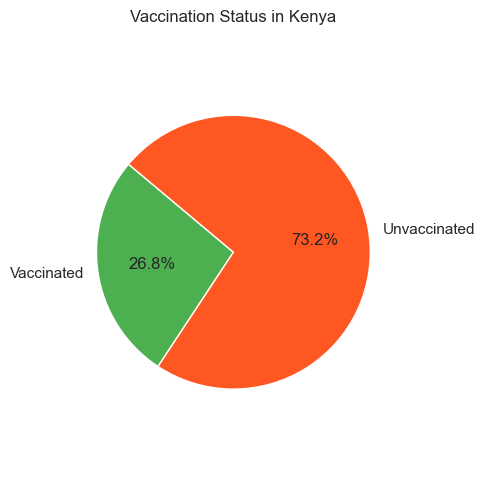

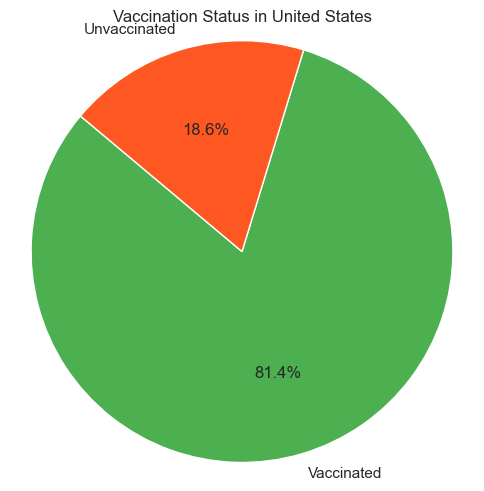

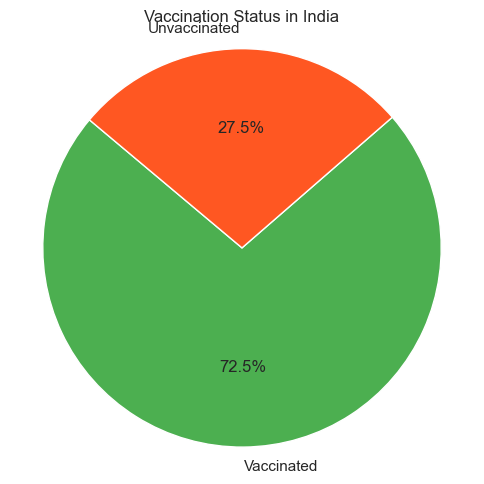

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('C:/Users/ADMIN/Downloads/owid-covid-data.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter for selected countries
countries = ['India', 'Kenya', 'United States']
df_filtered = df[df['location'].isin(countries)]

#1
# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#2
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/ADMIN/Downloads/owid-covid-data.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Keep only latest data for each country with valid vaccination info
df_latest = (
    df_filtered.dropna(subset=['people_vaccinated_per_hundred', 'population'])
    .sort_values('date')
    .groupby('location')
    .tail(1)
)

#3
# Create pie charts
for _, row in df_latest.iterrows():
    country = row['location']
    vaccinated_pct = row['people_vaccinated_per_hundred']
    unvaccinated_pct = 100 - vaccinated_pct

    labels = ['Vaccinated', 'Unvaccinated']
    sizes = [vaccinated_pct, unvaccinated_pct]
    colors = ['#4CAF50', '#FF5722']

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Vaccination Status in {country}')
    plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
    plt.tight_layout()
    plt.show()



## 6. Choropleth Map (Optional)

A **Choropleth map** is a powerful way to visualize COVID-19 case density or vaccination rates across different countries. The map will color-code countries based on the number of cases or vaccinations, providing a geographical representation of the global trends.

In this section, we will plot a choropleth map to show the distribution of COVID-19 cases by country.



In [16]:
import pandas as pd
import plotly.express as px

# Step 1: Load your COVID dataset
df = pd.read_csv('C:/Users/ADMIN/Downloads/owid-covid-data.csv')  # Update with your file path

# Step 2: Filter for the latest date per country
latest_df = df.sort_values('date').groupby('iso_code').tail(1)

# Step 3: Drop aggregate regions like "World", "Africa", etc.
latest_df = latest_df[latest_df['continent'].notna()]

# Step 4: Build the choropleth map
fig = px.choropleth(
    latest_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (Latest Available Date)'
)

fig.update_geos(showcountries=True, countrycolor="Black")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


## 5. Insights & Reporting

### Key Insights:
1. **COVID-19 Cases Over Time**: The USA has the highest cumulative COVID-19 cases, followed by India and Kenya. We observe significant spikes during certain periods (e.g., 2020).
2. **Vaccination Rollouts**: The USA and India show substantial vaccination progress, with India having a rapid increase in vaccinations since late 2021.
3. **Death Rates**: The death rate for the USA appears to be slightly higher than that of India, which could be attributed to various factors like healthcare infrastructure.

### Anomalies and Patterns:
- **Sudden Drop in New Cases**: India and Kenya both show sudden drops in new cases, which may be due to reporting delays or changes in testing policies.
- **Vaccine Rollout Speed**: While the USA had an early and fast vaccine rollout, India and Kenya's rollouts were slower initially but have picked up pace significantly in recent months.

These insights provide valuable understanding of the COVID-19 situation across these countries.

### Conclusion:
This analysis provides an overview of the global COVID-19 trends, with a focus on the USA, India, and Kenya. The data visualizations highlight key patterns and anomalies in case growth, death rates, and vaccination progress.
